In [2]:
# Import statements.
from dataset import *
from model_3d_bounding_box import *
import s3fs

In [12]:
# Global constants.
BUCKET_NAME = 'sagemaker-4bai-project'
S3_TRAIN_IMAGE_DIR = ('s3://{0}/KITTI/data_object_image_2/training/'
                      'image_2/').format(BUCKET_NAME)

['sagemaker-4bai-project/KITTI/.DS_Store', 'sagemaker-4bai-project/KITTI/data_object_calib', 'sagemaker-4bai-project/KITTI/data_object_image_2', 'sagemaker-4bai-project/KITTI/devkit_object', 'sagemaker-4bai-project/KITTI/models_lsvm']


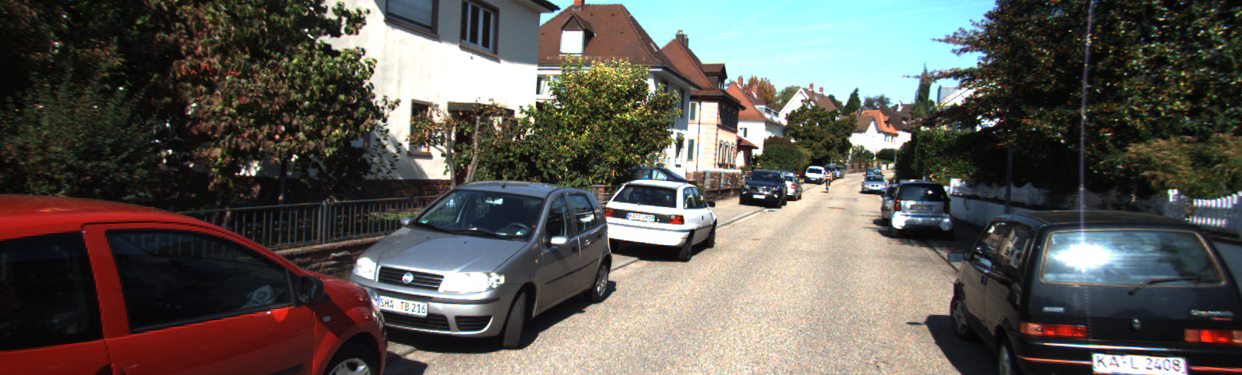

In [8]:
fs = s3fs.S3FileSystem()

# To List 5 files in your accessible bucket
print(fs.ls('s3://{0}/KITTI/'.format(BUCKET_NAME))[:5])

# open it directly
with fs.open('s3://{0}/KITTI/data_object_image_2/training/image_2/000008.png'.format(BUCKET_NAME)) as f:
    display(Image.open(f))

In [10]:
fs.ls('s3://{0}/KITTI/'.format(BUCKET_NAME))

['sagemaker-4bai-project/KITTI/.DS_Store',
 'sagemaker-4bai-project/KITTI/data_object_calib',
 'sagemaker-4bai-project/KITTI/data_object_image_2',
 'sagemaker-4bai-project/KITTI/devkit_object',
 'sagemaker-4bai-project/KITTI/models_lsvm',
 'sagemaker-4bai-project/KITTI/training']

In [11]:
def get_train_only_kitti_partition_s3(
    s3_train_image_dir: str,
    dataset_args: Dict[str, Any] = DEFAULT_DATASET_ARGS) -> Dict[str,List[str]]:
    """Returns a dict where the keys are 'train', 'test', and 'val', and the
    values are the images under each. The list is the authoratative order of the
    train/test examples; partition['train'][0] is the first training example,
    and x_train[0] will correspond with that filename. This partition is created
    using only the training data (for which we have labels).
    :param s3_train_image_dir: The directory in which are located all the
    training images, with the s3 prefix attached (looks like: 
    s3://sagemaker-4bai-project/KITTI/data_object_image_2/training/image_2/)
    :param dataset_args: The dataset arguments. See DEFAULT_DATASET_ARGS for
    available options.
    :return: The train/val/test partition.
    """
    dataset_args = {**DEFAULT_DATASET_ARGS, **dataset_args}
    partition = {}
    fs = s3fs.S3FileSystem()
    image_filenames = [filename.split('/')[-1] for
                       filename in sorted(fs.ls(s3_train_image_dir)) if
                       filename.endswith('.png')]
    np.random.seed(dataset_args['split_seed'])
    rand_indices = np.random.permutation(len(image_filenames))
    test_len = int(dataset_args['test_split'] * len(image_filenames))
    val_len = int(dataset_args['val_split'] * len(image_filenames))
    test_indices = rand_indices[:test_len]
    val_indices = rand_indices[test_len:test_len + val_len]
    train_indices = rand_indices[test_len + val_len:]
    partition[TRAIN_KEY] = [image_filenames[i] for i in train_indices]
    partition[VAL_KEY] = [image_filenames[i] for i in val_indices]
    partition[TEST_KEY] = [image_filenames[i] for i in test_indices]
    return partition

In [13]:
partition = get_train_only_kitti_partition_s3(S3_TRAIN_IMAGE_DIR)

In [14]:
partition

{'train': ['005333.png',
  '003647.png',
  '000571.png',
  '006824.png',
  '006917.png',
  '002394.png',
  '003174.png',
  '003191.png',
  '006491.png',
  '005938.png',
  '000607.png',
  '004496.png',
  '004929.png',
  '000365.png',
  '004257.png',
  '005026.png',
  '007129.png',
  '002040.png',
  '000389.png',
  '006154.png',
  '002855.png',
  '002153.png',
  '004689.png',
  '001365.png',
  '007251.png',
  '006872.png',
  '006500.png',
  '006406.png',
  '005106.png',
  '001042.png',
  '005953.png',
  '004034.png',
  '000267.png',
  '003269.png',
  '001521.png',
  '005459.png',
  '005712.png',
  '002297.png',
  '006385.png',
  '001488.png',
  '006501.png',
  '004907.png',
  '007353.png',
  '004893.png',
  '006754.png',
  '004870.png',
  '005639.png',
  '005599.png',
  '007422.png',
  '003025.png',
  '004515.png',
  '001043.png',
  '004436.png',
  '007389.png',
  '005172.png',
  '002066.png',
  '006543.png',
  '003553.png',
  '006147.png',
  '004882.png',
  '004188.png',
  '004423.png',